In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential 

## Loading the dataset from kersas dataset the size of the dataset is about 60k

In [68]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

## Training Data --> 60K images
## Test Data  --> 10K images
## Grayscale Images

## Displaying the image 


In [69]:
##display 
X_train[10].shape

(28, 28)

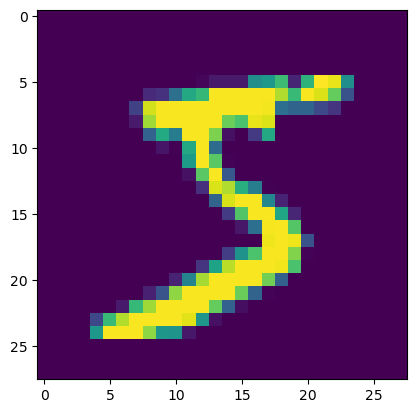

5


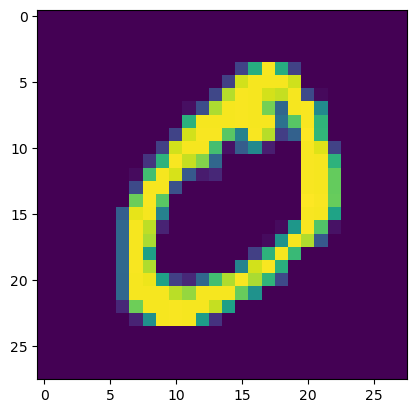

0


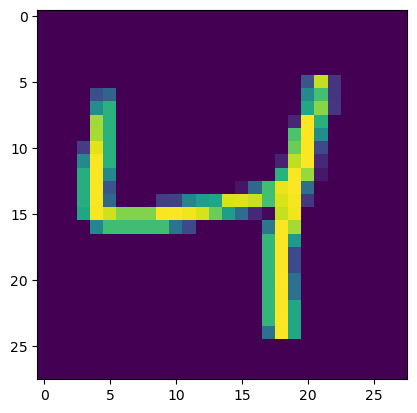

4


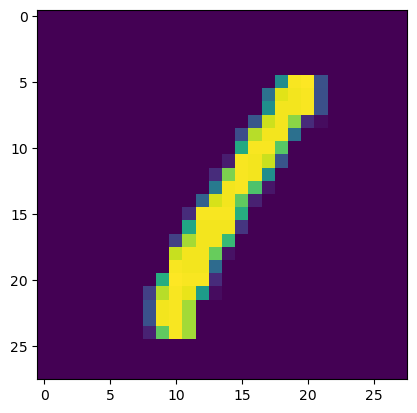

1


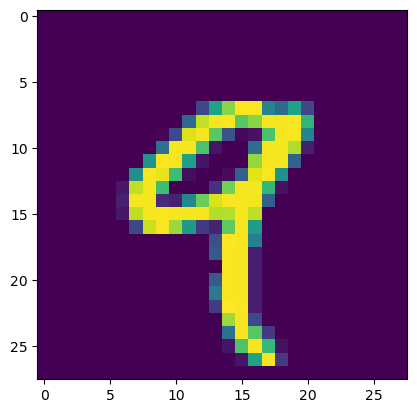

9


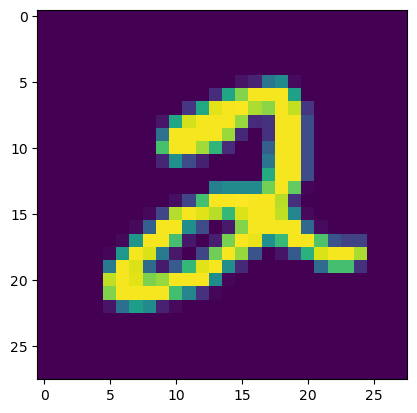

2


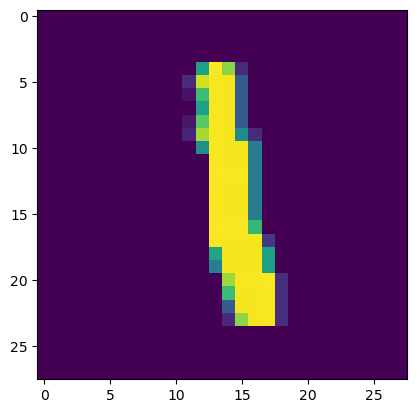

1


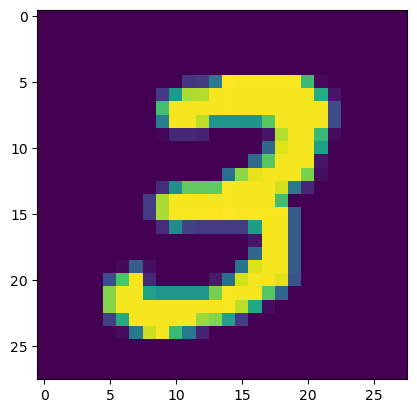

3


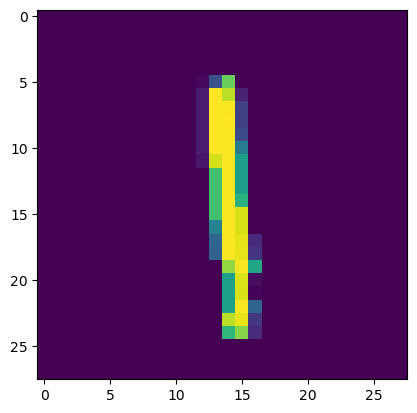

1


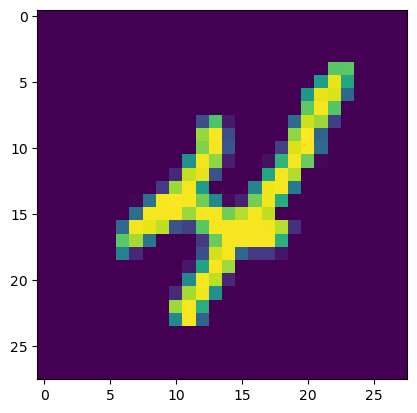

4


In [70]:
## Image is grayscale but matplotlib shows it in a different color channel 
for i in range(0,10):
    plt.imshow(X_train[i])
    plt.show()
    print(Y_train[i])

In [71]:
## the range of values we are trying to predict are
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


## Scaling the data for better accuracy and easier computation

In [72]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## setting up the neural network 

In [73]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [74]:
model = Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    Dense(units = 50,activation = "relu"),
    Dense(units = 50,activation = "relu"),
    Dense(units = 10,activation = 'linear')
])
model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),optimizer = 'adam',metrics = ["accuracy"])

In [75]:
model.fit(X_train_scaled,Y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 1s 505us/step - loss: 0.2972 - accuracy: 0.9152
Epoch 2/20
1875/1875 [==============================] - 1s 491us/step - loss: 0.1377 - accuracy: 0.9582
Epoch 3/20
1875/1875 [==============================] - 1s 477us/step - loss: 0.1030 - accuracy: 0.9683
Epoch 4/20
1875/1875 [==============================] - 1s 477us/step - loss: 0.0828 - accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 1s 478us/step - loss: 0.0699 - accuracy: 0.9777
Epoch 6/20
1875/1875 [==============================] - 1s 474us/step - loss: 0.0583 - accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 1s 475us/step - loss: 0.0519 - accuracy: 0.9839
Epoch 8/20
1875/1875 [==============================] - 1s 484us/step - loss: 0.0436 - accuracy: 0.9860
Epoch 9/20
1875/1875 [==============================] - 1s 485us/step - loss: 0.0383 - accuracy: 0.9880
Epoch 10/20
1875/1875 [==============================] - 1s 481u

## Training data accuracy comes out to be 99.46%


In [80]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)


313/313 [==============================] - 0s 349us/step - loss: 0.1527 - accuracy: 0.9710


In [82]:
print(accuracy)

0.9710000157356262


## Testing data accuracy is found to be around 97.10%

## Predicition

In [78]:
logits = model(X_test_scaled)
f_x = tf.nn.softmax(logits)
pred = np.argmax(f_x,axis = 1)

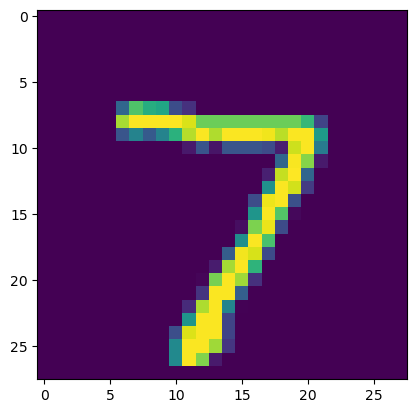

Actual value is: 7
Predicted value is: 7


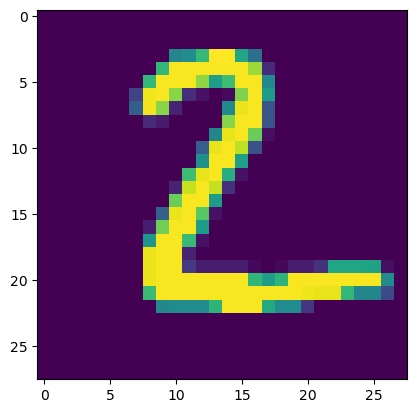

Actual value is: 2
Predicted value is: 2


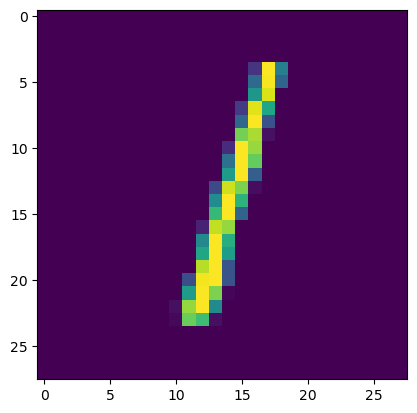

Actual value is: 1
Predicted value is: 1


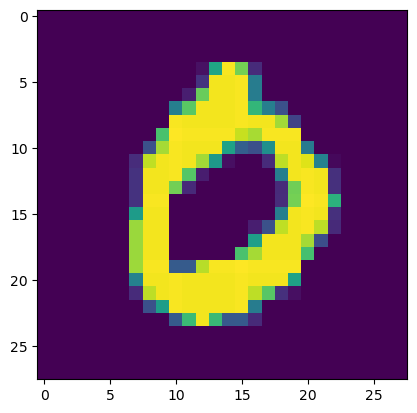

Actual value is: 0
Predicted value is: 0


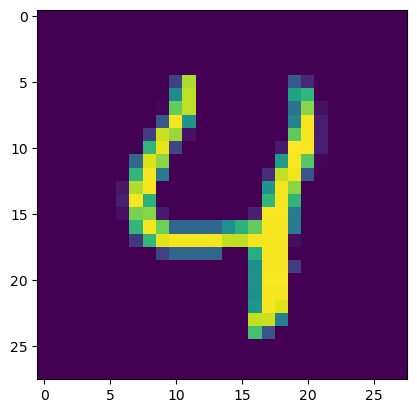

Actual value is: 4
Predicted value is: 4


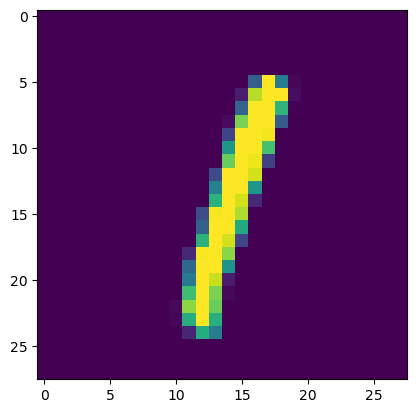

Actual value is: 1
Predicted value is: 1


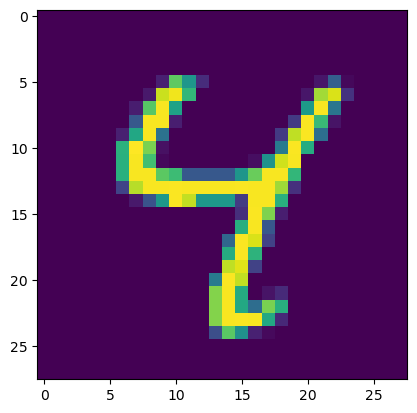

Actual value is: 4
Predicted value is: 4


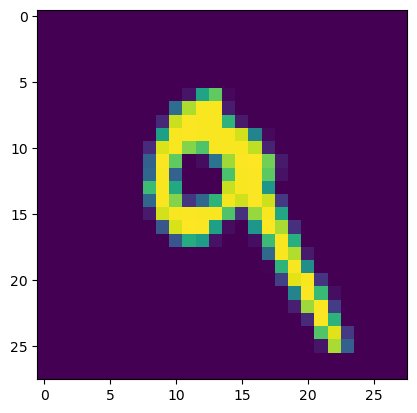

Actual value is: 9
Predicted value is: 9


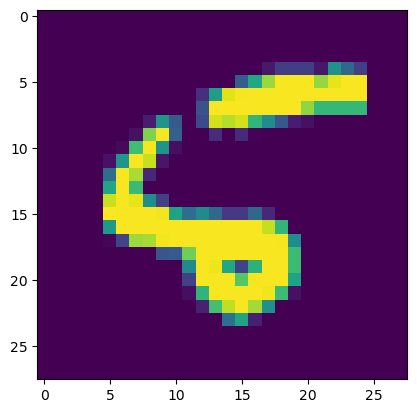

Actual value is: 5
Predicted value is: 5


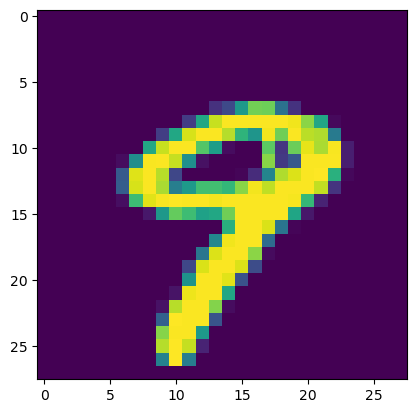

Actual value is: 9
Predicted value is: 9


In [79]:
for i in range(0,10):
    plt.imshow(X_test[i])
    plt.show()
    print(f'Actual value is: {Y_test[i]}')
    print(f'Predicted value is: {pred[i]}')